# Type 1 Diabetes

What is type 1 Diabetes

Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.  Treatment focuses on managing blood sugar levels with insulin, diet and lifestyle to prevent complications.   

By analysing the variable available of this are Blood Glucose level, Time of blood test, Carbs intake and Insulin dose.  The Blood Glucose level varies on different time of the day, Carbs intake and insulin dose level varies throughout the day.

During the analysis I found that the factors affecting the Blood Glucose level mainly carbs(food eaten) by the child.  The other factors affecting this if the child is sick where physical activity is less the blood glucose level goes high.

So let us use the below 8 different variables for our analysis.

* Date
* Time
* Day of the Week
* Blood Glucose Result (BG mmol recorded on blood test meter)
* Insulin Units (delivered to the child)
* Carb Ratio (grams per unit)
* Carb Intake (food eaten in grams)
* BG Level 

The Data that we will create with an algorithm, is based on the real life scenario of Type 1 Diabetes.

For this project I have taken the Type 1 Diabetes log for 20 days from  01/10/2019 to 20/10/2019. Blood Glucose level has recorded on average 8 time a day for 20 days.  Based on this real-world phenomenon as a model to synthesise the data.

# Data Cleanup

Activities for data cleanup also considered, creating different data sets using them to make one data frame.  The values has been used for analysis.  The data indexed for easy retrivel.  Duplication of records removed.

# Distributions


# Data Relationships

* Comparison between Carbs eaten and Blood Glucose level
* Time and Blood Glucose level
* The main variable is Blood Glucose level both Hight & Lows.  This is varies for variable reasons time of the day, the person growth (day by day), food eaten 2 hours before the blood test.  The Blood Glucose tested on morning as fast on week days and weekends varies on time.  If the kid is very small its hard to control whats to eat and whats not to eat.  

* The blood glucose level goes high for the following reasons.

1) The Insulin didnt delivered properly to the body
2) The Insulin dose is low for the carbs eaten
3) Carb count is not correct
4) If the Kid is sick

* The blood Glucose level goes low for the following reasons.

1) High Insulin delivered
2) Food not eaten for the carb entered
3) If the Kid is playing and active 

The week day blood glucose level stay stable compare to weekends, this is due to the fact the waking up time on weekends and eating breakfast is differs.

I devise an algorithm to generate the data set, simulating values of the 8 variables for 20 days.  I detail all this work in my notebook, and added code to generate the data set with the above properties.  


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from pandas.plotting import scatter_matrix


In [59]:
df=pd.read_csv("type1diabetesproject.csv")

# Type 1 Diabetes Actual Dataset

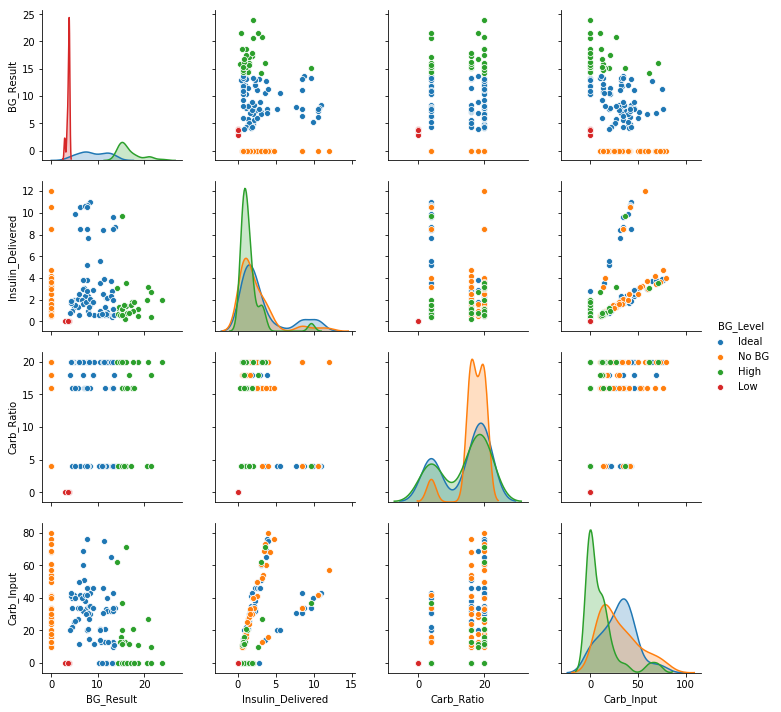

In [61]:
import seaborn as sns
sns.pairplot(df,hue="BG_Level")

In [65]:
import sklearn.neighbors as nei
inputs1=df[['BG_Result','Insulin_Delivered','Carb_Input']]
outputs1=df['BG_Level']

In [71]:
import sklearn.neighbors as nei
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs1, outputs1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
(knn.predict(inputs1)== outputs1).sum()

166

In [82]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs1,outputs1,test_size=0.33)

In [86]:
outputs_test

135    No BG 
168    No BG 
158     Ideal
25      Ideal
90        Low
73       High
54      Ideal
29       High
127      High
12       High
126    No BG 
152     Ideal
50       High
148       Low
117     Ideal
153     Ideal
113    No BG 
106    No BG 
87      Ideal
39      Ideal
82       High
80     No BG 
96     No BG 
85       High
67      Ideal
13      Ideal
115    No BG 
109     Ideal
162    No BG 
154    No BG 
84      Ideal
43     No BG 
33       High
142    No BG 
99     No BG 
15      Ideal
101     Ideal
6      No BG 
61      Ideal
111      High
81       High
140     Ideal
28     No BG 
150       Low
98      Ideal
7      No BG 
30       High
63        Low
10      Ideal
20     No BG 
16      Ideal
14      Ideal
48     No BG 
143       Low
83      Ideal
121      High
49     No BG 
Name: BG_Level, dtype: object

In [ ]:
# Reference

https://carelink.minimed.eu/patient/main/proReports.do
